In [1]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews= []

In [2]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['Quality product from snapdeal. Delivery was on time.',
 'Excellent product. Can be recommended to my friends and family members.',
 'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear',
 'Superb model , snapdeal delivered as promised time',
 'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted',
 'Really happy with the product and service..always the best..:)',
 'Marvallous Phone...Ever used....You must buy',
 'its nice to deal with Snapdeal. good shipping service at all...',
 'This is the first iPhone that I bought. After using android for 3 years, I was not satisfied with the performance. So, thought of going for iPhone. Though, I didnt want to go for iPhone 6S as it was very costly for me. So, decided that I will buy iPhone 5C.\n\nSnapdeal has provided me a very great deal as compar

## Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing Data

In [7]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Quality product from snapdeal. Delivery was on time.','Excellent product. Can be recommended to my friends and family members.','I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear','Superb model,snapdeal delivered as promised time','I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted','Really happy with the product and service..always the best..:)','Marvallous Phone...Ever used....You must buy','its nice to deal with Snapdeal. good shipping service at all...','This is the first iPhone that I bought. After using android for 3 years,...,very happy to own one. Recommending to everyone','Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price','IPhone 5c good product on good price. Within one day I got the product though in site specied 3 working days.',"""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",'good as like iphone,apple,and snapdeal service was good','Great product at such amazing price. Delivery was fast. N iPhone is amazing.','Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \xa0read more ','Lacks the feel.']


In [8]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'[\'Quality product from snapdeal. Delivery was on time.\'  \'Excellent product. Can be recommended to my friends and family members.\'  \'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear\'  \'Superb model   snapdeal delivered as promised time\'  \'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted\'  \'Really happy with the product and service..always the best..:)\'  \'Marvallous Phone...Ever used....You must buy\'  \'its nice to deal with Snapdeal. good shipping service at all...\'  \'This is the first iPhone that I bought. After using android for 3 years  I was not satisfied with the performance. So  thought of going for iPhone. Though  I didnt want to go for iPhone 6S as it was very costly for me. So  decided that I will buy iPhone 5C.\\n\\nSnapdeal has provided me a very great de

In [9]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Quality product from snapdeal Delivery was on time  Excellent product Can be recommended to my friends and family members  I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Superb model   snapdeal delivered as promised time  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Really happy with the product and servicealways the best  Marvallous PhoneEver usedYou must buy  its nice to deal with Snapdeal good shipping service at all  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has provided me a very great deal as compared to other sites Also  the delivery was very prompt as wel

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Quality product from snapdeal Delivery was on time  Excellent product Can be recommended to my friends and family members  I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Superb model   snapdeal delivered as promised time  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Really happy with the product and servicealways the best  Marvallous PhoneEver usedYou must buy  its nice to deal with Snapdeal good shipping service at all  This is the first iPhone that I bought After using android for 3 years  I was not satisfied with the performance So  thought of going for iPhone Though  I didnt want to go for iPhone 6S as it was very costly for me So  decided that I will buy iPhone 5CnnSnapdeal has provided me a very great deal as compared to other sites Also  the delivery was very prompt as wel

In [12]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['Quality', 'product', 'from', 'snapdeal', 'Delivery', 'was', 'on', 'time', 'Excellent', 'product', 'Can', 'be', 'recommended', 'to', 'my', 'friends', 'and', 'family', 'members', 'I', 'M', 'Happy', 'With', 'iphone5c', 'and', 'snapdeal', 'services', 'i', 'would', 'recommended', 'Snapdeal', 'service', 'my', 'near', 'dear', 'Superb', 'model', 'snapdeal', 'delivered', 'as', 'promised', 'time', 'I', 'am', 'very', 'very', 'happy', 'with', 'this', 'iPhone', 'when', 'I', 'was', 'ordering', 'this', 'phone', 'I', 'had', 'little', 'doubt', 'about', 'that', 'But', 'after', 'receiving', 'this', 'phone', 'I', 'am', 'really', 'very', 'happyalso', 'found', 'original', 'I', 'iPhoneearlier', 'I', 'had', 'doubted', 'Really', 'happy', 'with', 'the', 'product', 'and', 'servicealways', 'the', 'best', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'its', 'nice', 'to', 'deal', 'with', 'Snapdeal', 'good', 'shipping', 'service', 'at', 'all', 'This', 'is', 'the', 'first', 'iPhone', 'that', 'I', 'bought', '

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Quality', 'product', 'snapdeal', 'Delivery', 'time', 'Excellent', 'product', 'Can', 'recommended', 'friends', 'family', 'members', 'M', 'Happy', 'With', 'iphone5c', 'snapdeal', 'services', 'would', 'recommended', 'Snapdeal', 'service', 'near', 'dear', 'Superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'happy', 'iPhone', 'ordering', 'phone', 'little', 'doubt', 'But', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iPhoneearlier', 'doubted', 'Really', 'happy', 'product', 'servicealways', 'best', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'nice', 'deal', 'Snapdeal', 'good', 'shipping', 'service', 'This', 'first', 'iPhone', 'bought', 'After', 'using', 'android', '3', 'years', 'satisfied', 'performance', 'So', 'thought', 'going', 'iPhone', 'Though', 'didnt', 'want', 'go', 'iPhone', '6S', 'costly', 'So', 'decided', 'buy', 'iPhone', '5CnnSnapdeal', 'provided', 'great', 'deal', 'compared', 'sites', 'Also', 'delivery', 'prompt', 'wellnnPros', 'Sleek',

In [16]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['sexy', 'lags', 'really', 'great', 'headphone', 'got', 'upgrade', 'ios', '9nncons', 'plastic', 'body', 'service', 'quality', 'good', 'level', 'interactions', 'good', 'very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'it', 'packed', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'ios', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'everyone', 'go', 'phone', 'budget', '20k', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'genuine', 'product', 'quality', 'great', 'overall', 'perfect', 'bought', 'iphone', '5c', 'snapdeal', 'product', 'absolutly', 'real', 'wors', 'properly', 'price', 'also', 'low', 'online', 'shoping', 'sides']


In [17]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['sexi', 'lag', 'realli', 'great', 'headphon', 'got', 'upgrad', 'io', '9nncon', 'plastic', 'bodi', 'servic', 'qualiti', 'good', 'level', 'interact', 'good', 'veri', 'good', 'product', 'deliv', 'time', 'commit', 'true', 'valu', 'money', 'recent', 'purchas', 'phone', 'bit', 'doubtful', 'purchas', 'must', 'tell', 'best', 'iphon', 'get', 'price', 'it', 'pack', 'beati', 'seller', 'day', 'dispatchnprosn1', 'veri', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'veri', 'smoothn4', 'good', 'build', 'qualitynnconsn1plast', 'bodyn2', '8gb', 'memorynnbut', 'even', 'plastic', 'bodi', 'look', 'attract', 'premium', 'good', 'plastuc', 'use', 'everyon', 'go', 'phone', 'budget', '20k', 'awesom', 'iphon', 'price', 'rangeni', 'would', 'recommend', 'phone', 'genuin', 'product', 'qualiti', 'great', 'overal', 'perfect', 'bought', 'iphon', '5c', 'snapdeal', 'product', 'absolutli', 'real', 'wor', 'properli', 'price', 'also', 'low', 'onlin', 'shope', 'side']


In [18]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

quality product snapdeal delivery time excellent product can recommended friends family members m happy with iphone5c snapdeal services would recommended snapdeal service near dear superb model snapdeal delivered promised time happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted really happy product servicealways best marvallous phoneever usedyou must buy nice deal snapdeal good shipping service this first iphone bought after using android 3 years satisfied performance so thought going iphone though didnt want go iphone 6s costly so decided buy iphone 5cnnsnapdeal provided great deal compared sites also delivery prompt wellnnpros sleek phone looks sexy lags really great headphone got upgrade ios 9nncons plastic body service quality good level interactions good very good product delivered time committed true value money recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully selle

In [19]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['quality', 'product', 'snapdeal', 'delivery', 'time', 'excellent', 'product', 'can', 'recommend', 'friend', 'family', 'member', 'm', 'happy', 'with', 'iphone5c', 'snapdeal', 'service', 'would', 'recommend', 'snapdeal', 'service', 'near', 'dear', 'superb', 'model', 'snapdeal', 'deliver', 'promise', 'time', 'happy', 'iphone', 'order', 'phone', 'little', 'doubt', 'but', 'receive', 'phone', 'really', 'happyalso', 'find', 'original', 'iphoneearlier', 'doubted', 'really', 'happy', 'product', 'servicealway', 'good', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'nice', 'deal', 'snapdeal', 'good', 'shipping', 'service', 'this', 'first', 'iphone', 'buy', 'after', 'use', 'android', '3', 'year', 'satisfied', 'performance', 'so', 'think', 'go', 'iphone', 'though', 'do', 'not', 'want', 'go', 'iphone', '6s', 'costly', 'so', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide', 'great', 'deal', 'compare', 'site', 'also', 'delivery', 'prompt', 'wellnnpros', 'sleek', 'phone', 'look', 'sexy', 'l

In [20]:
clean_comments= ' '.join(lemmas)
clean_comments

'quality product snapdeal delivery time excellent product can recommend friend family member m happy with iphone5c snapdeal service would recommend snapdeal service near dear superb model snapdeal deliver promise time happy iphone order phone little doubt but receive phone really happyalso find original iphoneearlier doubted really happy product servicealway good marvallous phoneever usedyou must buy nice deal snapdeal good shipping service this first iphone buy after use android 3 year satisfied performance so think go iphone though do not want go iphone 6s costly so decide buy iphone 5cnnsnapdeal provide great deal compare site also delivery prompt wellnnpros sleek phone look sexy lag really great headphone get upgrade ios 9nncons plastic body service quality good level interaction good very good product deliver time commit true value money recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2

In [21]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'quality': 276, 'product': 263, 'snapdeal': 333, 'delivery': 96, 'time': 368, 'excellent': 119, 'can': 56, 'recommend': 290, 'friend': 136, 'family': 123, 'member': 201, 'happy': 151, 'with': 399, 'iphone5c': 173, 'service': 310, 'would': 407, 'near': 215, 'dear': 92, 'superb': 347, 'model': 206, 'deliver': 95, 'promise': 267, 'iphone': 172, 'order': 231, 'phone': 244, 'little': 190, 'doubt': 104, 'but': 53, 'receive': 286, 'really': 285, 'happyalso': 152, 'find': 129, 'original': 232, 'iphoneearlier': 174, 'doubted': 105, 'servicealway': 311, 'good': 143, 'marvallous': 198, 'phoneever': 245, 'usedyou': 387, 'must': 211, 'buy': 54, 'nice': 220, 'deal': 91, 'shipping': 317, 'this': 362, 'first': 131, 'after': 18, 'use': 386, 'android': 26, 'year': 409, 'satisfied': 300, 'performance': 243, 'so': 336, 'think': 361, 'go': 142, 'though': 364, 'do': 103, 'not': 222, 'want': 392, '6s': 9, 'costly': 78, 'decide': 93, '5cnnsnapdeal': 8, 'provide': 272, 'great': 147, 'compare': 70, 'site': 327

In [23]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull'
 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever'
 'everyone' 'everything' 'excellent' 'expectation' 'experience' 'fake'
 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first'
 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get'
 'gift' 'go' 'good' 'goodbut' 'goood' 'grand' 'great' 'guess' 'hahahaha'
 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear' 'heat' 'heavy'
 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv' 'in' 'initially'
 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone' 'iphone5c'
 'iphoneearlier' 'issue' 'it' 'item' 'itnniphone' 'its' 'job' 'lack' 'lag'
 'lagging' 'late' 'leave' 'level' 'like' 'limit' 'listnnapple' 'little'
 'look' 'love' 'lovely' 'low' 'make' 'manufacturer' 'mark' 'marvallous'
 'may']


In [24]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(clean_commentscv.toarray().shape)

(1028, 411)


## n-gram

In [26]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'awsme' 'battery'
 'be' 'body' 'box' 'brand' 'bt' 'budget' 'but' 'buy' 'camera' 'can'
 'cheap' 'condition' 'cool' 'day' 'deal' 'deliver' 'delivery' 'do' 'even'
 'excellent' 'experience' 'fast' 'file' 'gb' 'genuine' 'get' 'go' 'good'
 'great' 'happy' 'io' 'iphone' 'issue' 'it' 'its' 'job' 'late' 'like'
 'look' 'low' 'memory' 'mobile' 'money' 'need' 'new' 'nice' 'not' 'offer'
 'one' 'order' 'original' 'os' 'overall' 'pack' 'pay' 'perfect'
 'perfectly' 'perform' 'phone' 'plastic' 'price' 'problem' 'product'
 'quality' 'really' 'receive' 'recommend' 'satisfied' 'seller' 'service'
 'site' 'snap' 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the'
 'this' 'though' 'till' 'time' 'use' 'very' 'want' 'within' 'worth'
 'would' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

## Generate Wordcloud

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

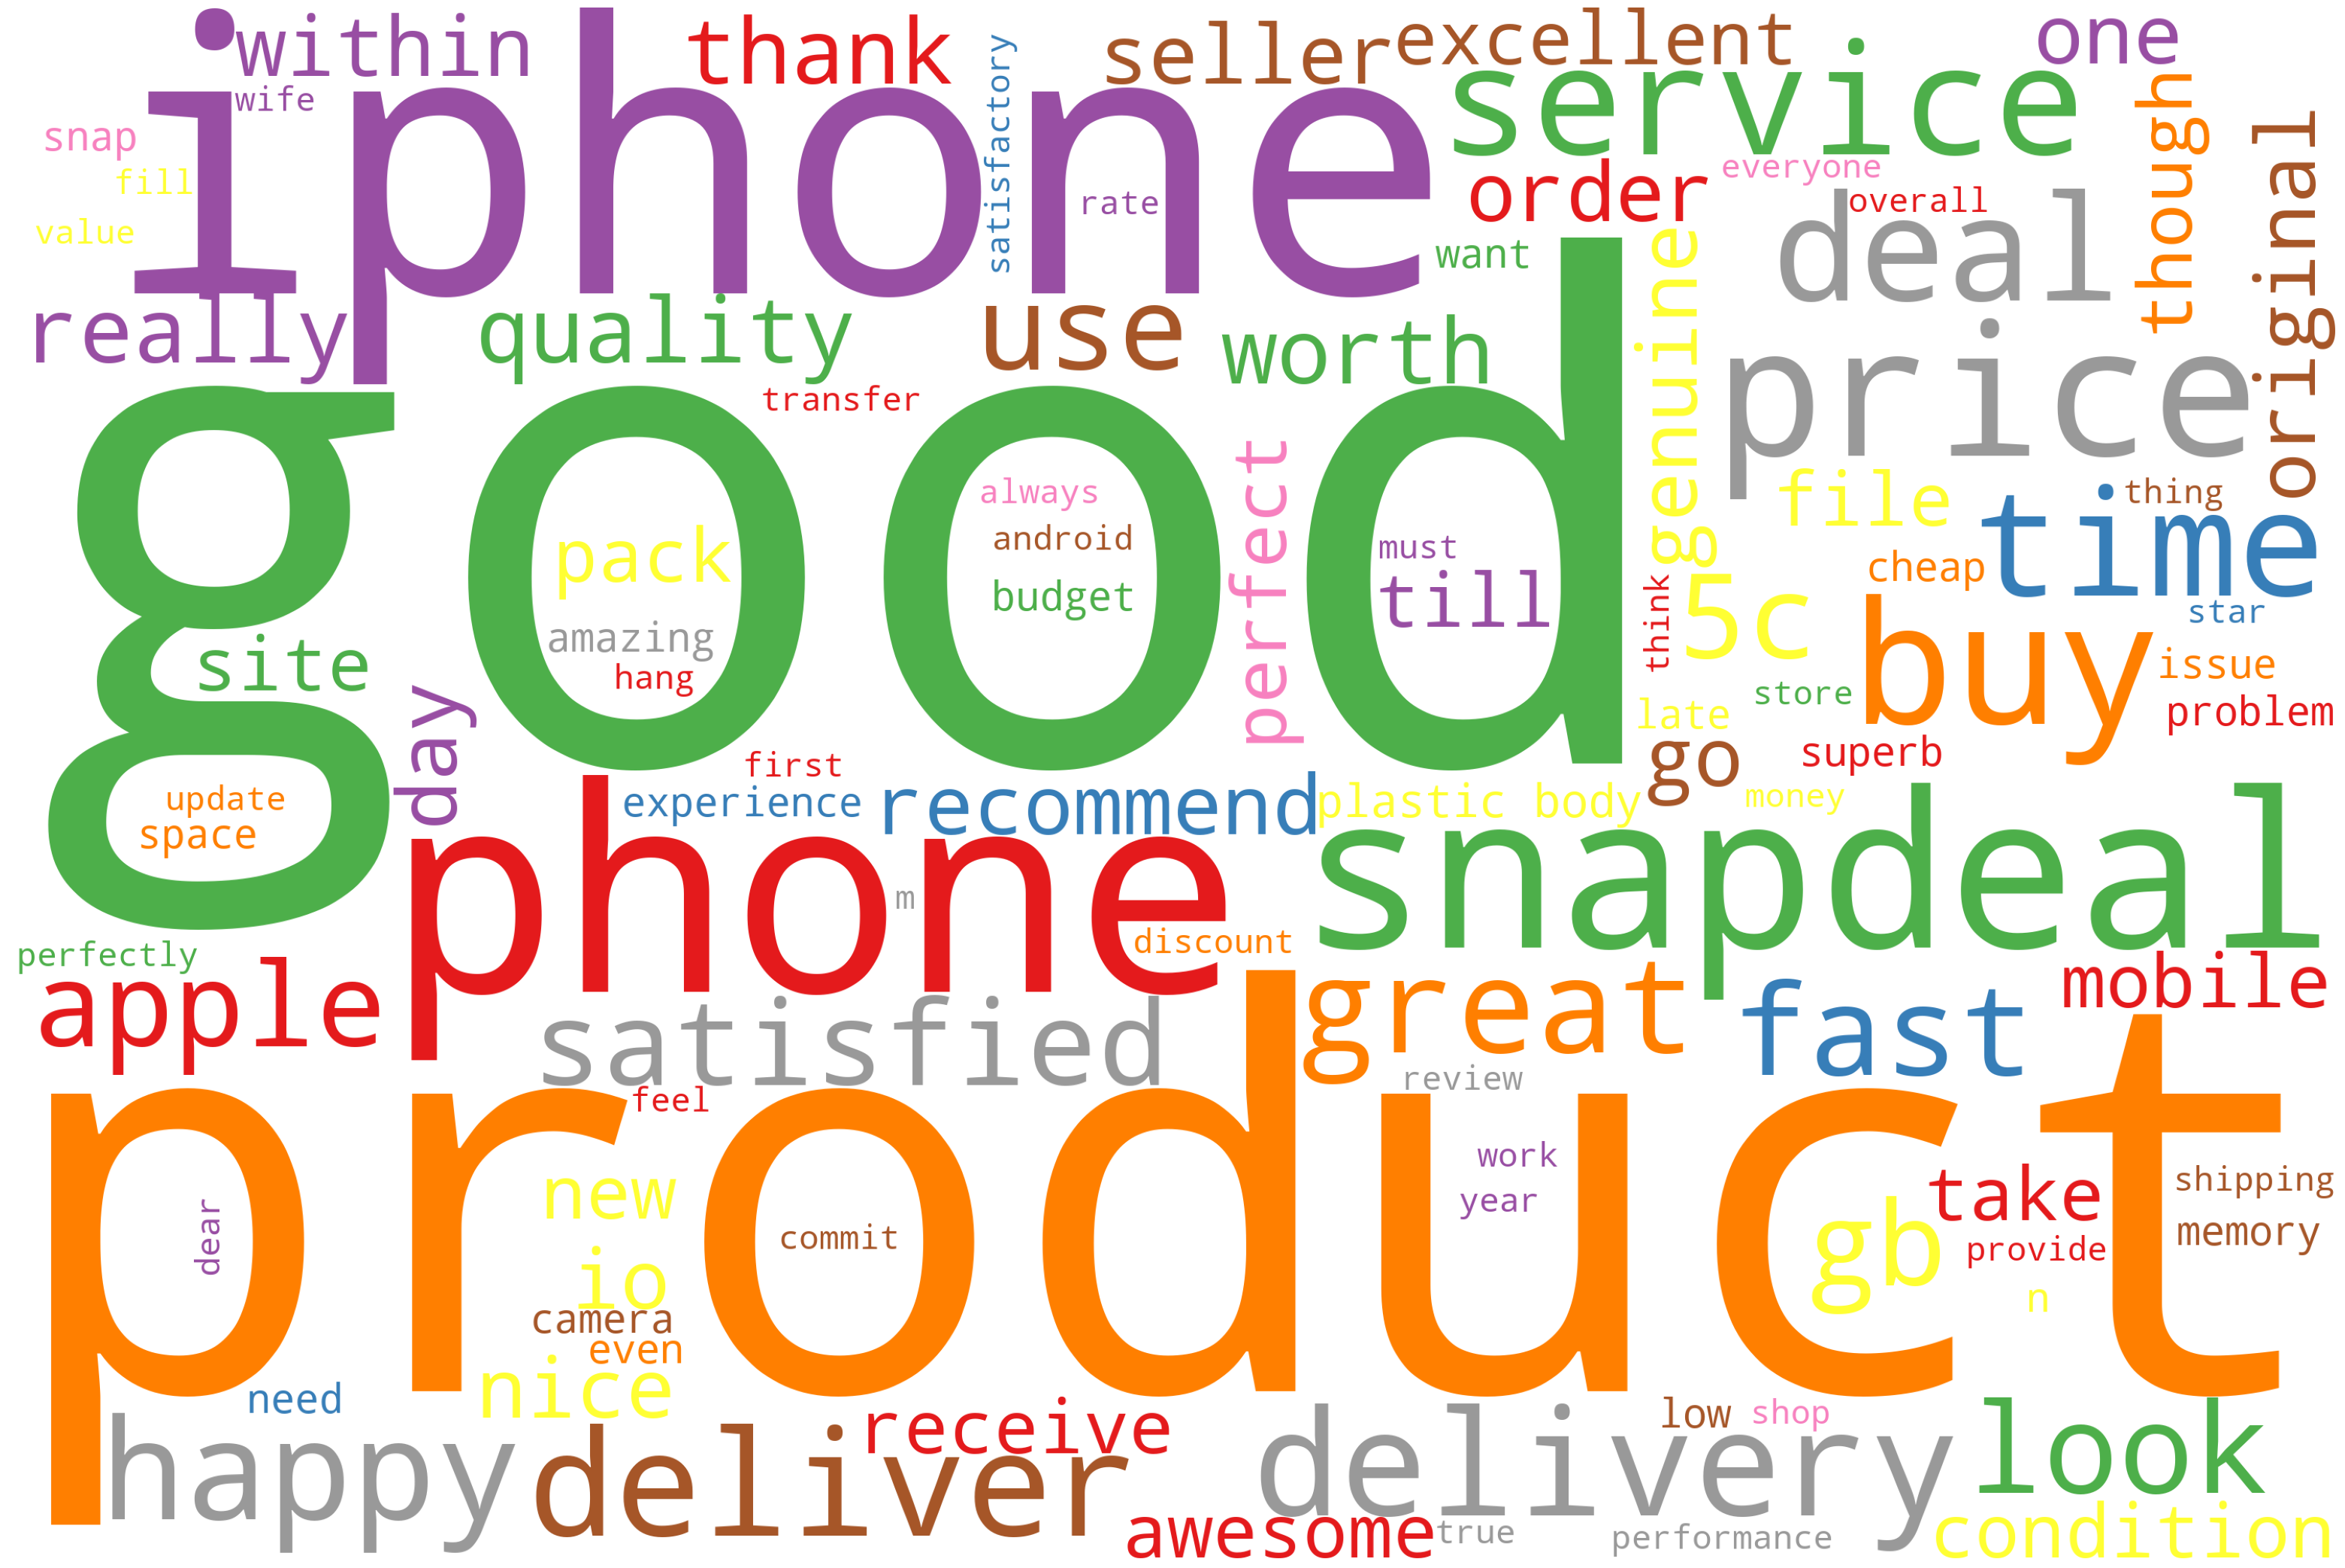

In [30]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

## Name Entity Recognition

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

look NOUN
sexy ADJ
lag NOUN
really ADV
great ADJ
headphone NOUN
get VERB
upgrade VERB
ios NUM
9nncons NUM
plastic NOUN
body NOUN
service NOUN
quality NOUN
good ADJ
level NOUN
interaction NOUN
good ADJ
very ADV
good ADJ
product NOUN
deliver NOUN
time NOUN
commit VERB
true ADJ
value NOUN
money NOUN
recently ADV
purchase VERB
phone NOUN
bit NOUN
doubtfull ADJ
purchasing NOUN
must AUX
tell VERB
good ADJ
iphone NOUN
get VERB
price NOUN
it PRON
pack VERB
beatifully ADV
seller NOUN
day NOUN
dispatchnprosn1 NOUN
very ADV
cheap ADJ
prizen2 ADV
io VERB
9 NUM
upgraden3 ADJ
very ADV
smoothn4 ADJ
good ADJ
build NOUN
qualitynnconsn1plastic PROPN
bodyn2 NOUN
8 NUM
gb NOUN
memorynnbut ADJ
even ADV
plastic ADJ
body NOUN
look VERB
attractive ADJ
premium NOUN
good ADJ
plastuc NOUN
use VERB
everyone PRON
go VERB
phone NOUN
budget NOUN
20k NOUN
awesome ADJ
iphone NOUN
price NOUN
rangeni NOUN
would AUX
recommend VERB
phone NOUN
genuine ADJ
product NOUN
quality NOUN
great ADJ
overall ADJ
perfect ADJ
buy NOUN

In [33]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'product', 'quality', 'buy', 'iphone', 'product', 'wor', 'price', 'shop', 'side', 'phone', 'class', 'service', 'ð\x9f\x98\x98', 'iphone', 'cell', 'mush', 'deal', 'get', 'ths', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'earn', 'trust', 'buy', 'wife', 'surprise', 'get', 'deliver', 'time', 'product', 'supply', 'price', 'show', 'buy', 'iphone', 'deal', 'product', 'update', 'ios', 'deal', 'goood', 'ship', 'buy', 'product', 'product', 'accessory', 'iphone', 'thank', 'provide', 'product', 'choice', 'deal', 'buy', 'product', 'picture', 'quality', 'sound', 'hear', 'ad', 'look', 'feel', 'n', 'ncon', 'transfer', 'file', 'use', 'andriodblackberrywindow', 'iphone', 'use', 'file', 'transfer', 'app', 'shareitnnother', 'iphone', 'itnniphone', 'time', 'delivery', 'star', 'phone', 'mobile', 'oparating', 'work', 'memory', 'fill', 'gb', 'limit', 'get', 'discount', 'phone', 'wife', 'want', 'try', 'iphone', 'love', 'product', 'quality']


In [34]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,time,11
8,deliver,11
9,deal,11


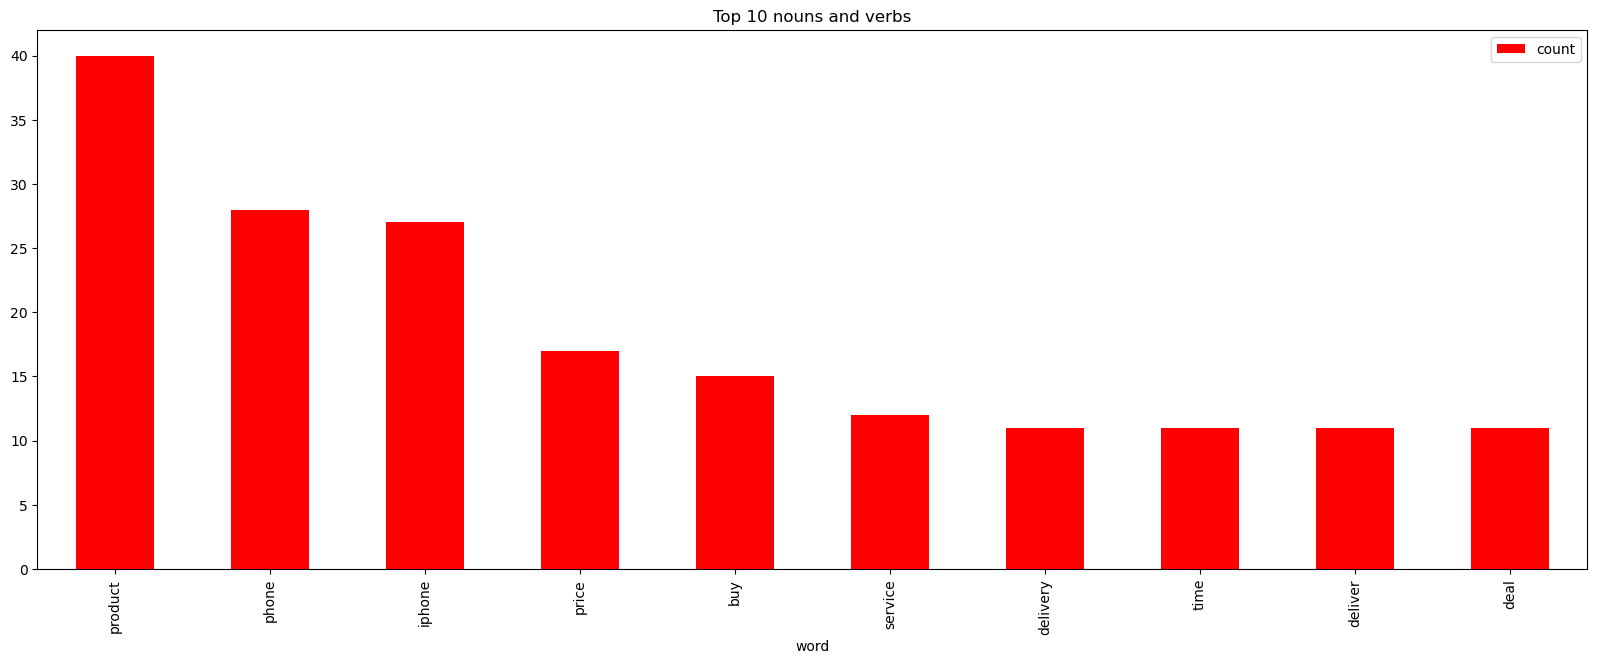

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');


## Emotion Mining Analysis

In [36]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Quality product from snapdeal.',
 'Delivery was on time.',
 'Excellent product.',
 'Can be recommended to my friends and family members.',
 'I M Happy With iphone5c and snapdeal services.',
 'i would recommended Snapdeal service my near & dear Superb model , snapdeal delivered as promised time I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that.',
 'But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted Really happy with the product and service..always the best..:) Marvallous Phone...Ever used....You must buy its nice to deal with Snapdeal.',
 'good shipping service at all...',
 'This is the first iPhone that I bought.',
 'After using android for 3 years, I was not satisfied with the performance.',
 'So, thought of going for iPhone.',
 'Though, I didnt want to go for iPhone 6S as it was very costly for me.',
 'So, decided that I will buy iPhone 5C.',
 'Snapdeal has provided me a very gre

In [37]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Quality product from snapdeal.
1,Delivery was on time.
2,Excellent product.
3,Can be recommended to my friends and family me...
4,I M Happy With iphone5c and snapdeal services.
...,...
122,great job team.
123,"good as like iphone, apple , and snapdeal ser..."
124,Delivery was fast.
125,N iPhone is amazing.


In [38]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [39]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [40]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [41]:
# manual testing
calculate_sentiment(text= 'great')

3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3       2
4       0
       ..
122     3
123    15
124     0
125     4
126     0
Name: sentiment_value, Length: 127, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       4
1       4
2       2
3       9
4       8
       ..
122     3
123    17
124     3
125     4
126    33
Name: word_count, Length: 127, dtype: int64

In [44]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
41,But those all reviews are fake and just to dam...,-6,14
77,Dont buy on fraudulent schemes.,-4,5
86,Dere is only one problem nd dat is space... Bt...,-4,20
68,Only problem is you need to pay for everything.,-3,9
116,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
36,Satisfied and will buy more products from Snap...,14,46
123,"good as like iphone, apple , and snapdeal ser...",15,17
118,Recommending to everyone Worth buying from sna...,17,31
96,Very good phone in this price category with ma...,22,65


In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.866142
std        4.544947
min       -6.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       22.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Quality product from snapdeal.,0,4
1,Delivery was on time.,0,4
4,I M Happy With iphone5c and snapdeal services.,0,8
8,This is the first iPhone that I bought.,0,8
10,"So, thought of going for iPhone.",0,6
11,"Though, I didnt want to go for iPhone 6S as it...",-1,16
12,"So, decided that I will buy iPhone 5C.",0,8
14,"Also, the delivery was very prompt as well.",0,8
17,It was packed beatifully by the seller and sam...,0,11
18,Pros\n1.,0,2


In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,Excellent product.,3,2
3,Can be recommended to my friends and family me...,2,9
5,i would recommended Snapdeal service my near &...,7,37
6,But after receiving this phone I am really ver...,8,37
7,good shipping service at all...,3,5
...,...,...,...
120,Ordered for my sister's rakhi gift 1 week prior .,2,10
121,however it came faster than that..\nand thanks...,2,14
122,great job team.,3,3
123,"good as like iphone, apple , and snapdeal ser...",15,17


In [48]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Quality product from snapdeal.,0,4,0
1,Delivery was on time.,0,4,1
2,Excellent product.,3,2,2
3,Can be recommended to my friends and family me...,2,9,3
4,I M Happy With iphone5c and snapdeal services.,0,8,4
...,...,...,...,...
122,great job team.,3,3,122
123,"good as like iphone, apple , and snapdeal ser...",15,17,123
124,Delivery was fast.,0,3,124
125,N iPhone is amazing.,4,4,125


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6604\3029961482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

<Axes: xlabel='sentiment_value', ylabel='Density'>

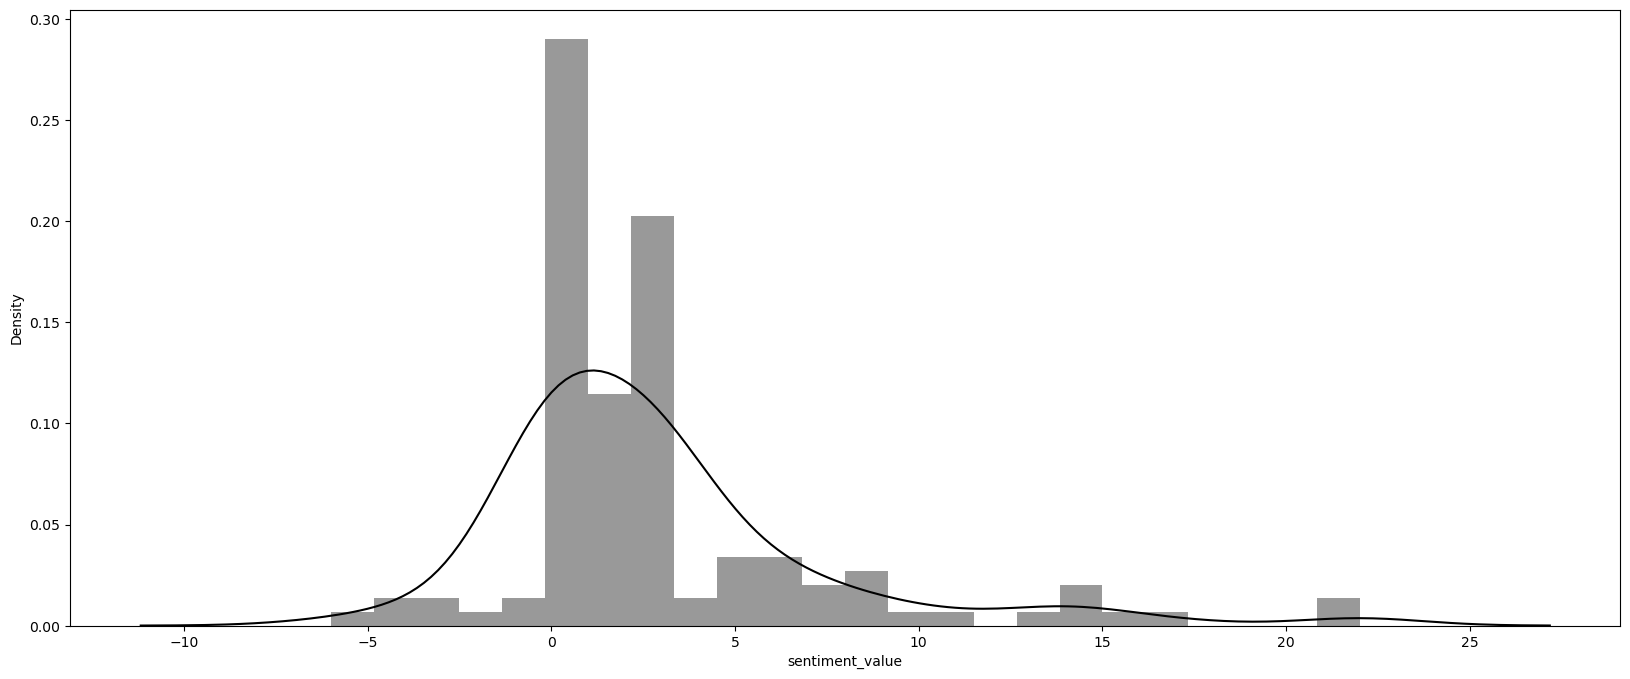

In [49]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

<Axes: xlabel='index', ylabel='sentiment_value'>

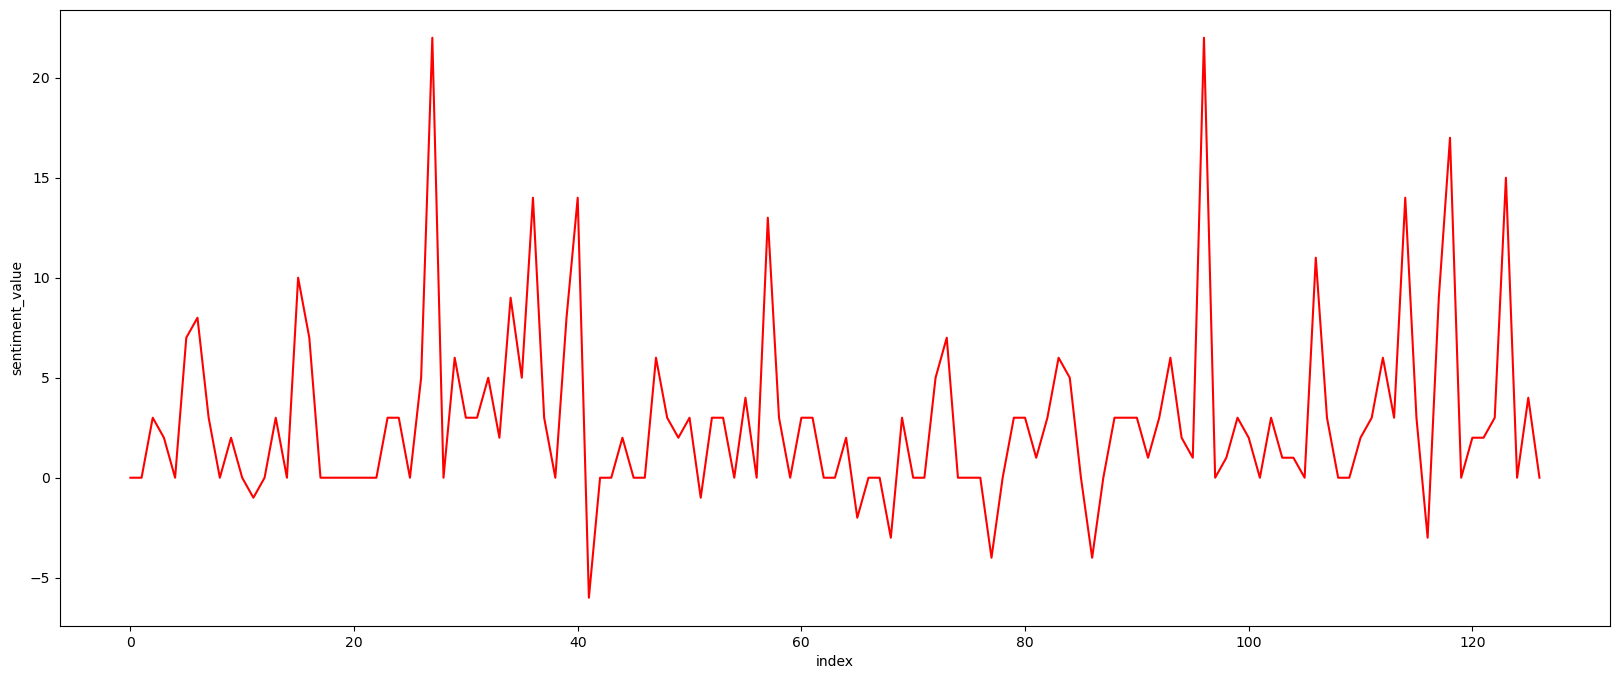

In [50]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

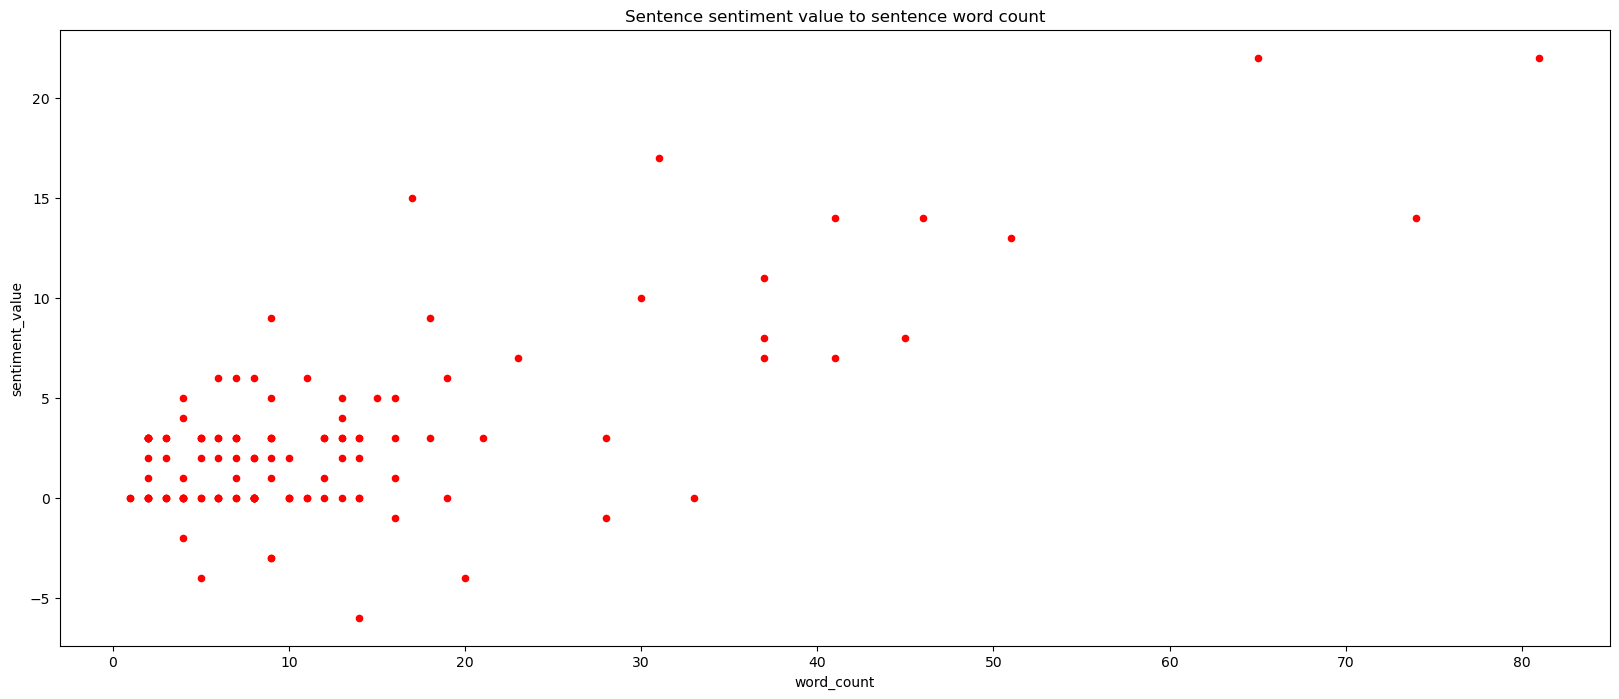

In [51]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')